In [1]:
import dataclasses

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
@dataclasses.dataclass
class Data:
    train: pd.DataFrame
    test: pd.DataFrame

In [3]:
FILES = ('discounts_train.parq.gzip', 'discounts_test.parq.gzip')

sns.set_style("darkgrid")
pd.options.display.max_columns = 100

In [4]:
data = Data(
    train=pd.read_parquet(FILES[0]),
    test=pd.read_parquet(FILES[1])
)

In [5]:
data.train.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,spend_5m_clothes,spend_6m_clothes,spend_1m_health,spend_2m_health,spend_3m_health,spend_4m_health,spend_5m_health,spend_6m_health,spend_1m_pet,spend_2m_pet,spend_3m_pet,spend_4m_pet,spend_5m_pet,spend_6m_pet,spend_1m_groceries,spend_2m_groceries,spend_3m_groceries,spend_4m_groceries,spend_5m_groceries,spend_6m_groceries,spend_1m_eletronic,spend_2m_eletronic,spend_3m_eletronic,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure,sales_prediction_bins,sales_prediction
0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,45,15,30.0,55.0,10.0,160.0,0,0,0,0.0,0.0,0.0,3368.64,125.0,40.06,40,1.0,MA,6,8,1351.024765
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,10.0,0.0,0,0,0,0.0,0.0,0.0,2133.10,75.0,29.52,36,0.0,MG,10,4,1035.580387
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,30,35.0,0.0,20.0,50.0,0,0,0,0.0,0.0,0.0,2001.62,50.0,48.08,34,0.0,RJ,7,3,992.401825
3,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,55,135,120.0,10.0,40.0,130.0,0,0,0,0.0,0.0,0.0,1461.96,10.0,61.64,31,0.0,BA,7,1,919.720735
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,0,10.0,95.0,25.0,20.0,0,0,0,0.0,0.0,0.0,2743.72,100.0,34.44,32,1.0,PB,6,6,1176.485681


In [18]:
fit_1 = smf.ols('profit ~ discount + C(sales_prediction_bins)', data=data.train).fit()
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     96.23
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          5.30e-194
Time:                        13:07:38   Log-Likelihood:                -68078.
No. Observations:               15000   AIC:                         1.362e+05
Df Residuals:                   14989   BIC:                         1.363e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        45.1995      0.616     73.397      0.000      43.992      46.407
C(sales_prediction_bins)[T.1]     0.3418      0.858      0.399      0.690      -1.339       2.023
C(sales_prediction_bins)[T.2]    -1.7348      0.964     -1.799      0.072      -3.625       0.156
C(sales_prediction_bins)[T.3]    -3.5352      1.102     -3.209      0.001      -5.694      -1.376
C(sales_prediction_bins)[T.4]    -4.9727      1.294     -3.842      0.000      -7.510      -2.436
C(sales_prediction_bins)[T.5]    -5.4330      1.484     -3.661      0.000      -8.342      -2.524
C(sales_prediction_bins)[T.6]     0.9766      1.723      0.567      0.571      -2.400       4.353
C(sales_prediction_bins)[T.7]     9.7498      1.921      5.075      0.000       5.984      13.515
C(sales_prediction_bins)[T.8]    11.9732      2.187      5.475      0.000       7.687      16.260
C(sales_prediction_bins)[T.9]    11.8579      2.393      4.954      0.000       7.167      16.549
discount                         -0.0247      0.017     -1.464      0.143      -0.058       0.008
==============================================================================
Omnibus:                    11358.473   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           579356.418
Skew:                           3.163   Prob(JB):                         0.00
Kurtosis:                      32.782   Cond. No.                     2.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
debias_model = smf.ols('discount ~ C(sales_prediction_bins)', data=data.train).fit()
debias_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               discount   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 2.552e+04
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:10:17   Log-Likelihood:                -57189.
No. Observations:               15000   AIC:                         1.144e+05
Df Residuals:                   14990   BIC:                         1.145e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        11.4467      0.283     40.460      0.000      10.892      12.001
C(sales_prediction_bins)[T.1]    13.4733      0.400     33.675      0.000      12.689      14.258
C(sales_prediction_bins)[T.2]    29.4382      0.400     73.614      0.000      28.654      30.222
C(sales_prediction_bins)[T.3]    43.0857      0.400    107.634      0.000      42.301      43.870
C(sales_prediction_bins)[T.4]    58.9800      0.400    147.413      0.000      58.196      59.764
C(sales_prediction_bins)[T.5]    72.9933      0.400    182.438      0.000      72.209      73.778
C(sales_prediction_bins)[T.6]    89.5300      0.400    223.769      0.000      88.746      90.314
C(sales_prediction_bins)[T.7]   102.7200      0.400    256.736      0.000     101.936     103.504
C(sales_prediction_bins)[T.8]   119.9333      0.400    299.759      0.000     119.149     120.718
C(sales_prediction_bins)[T.9]   133.0500      0.400    332.542      0.000     132.266     133.834
==============================================================================
Omnibus:                       12.743   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.597
Skew:                           0.061   Prob(JB):                      0.00184
Kurtosis:                       2.927   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

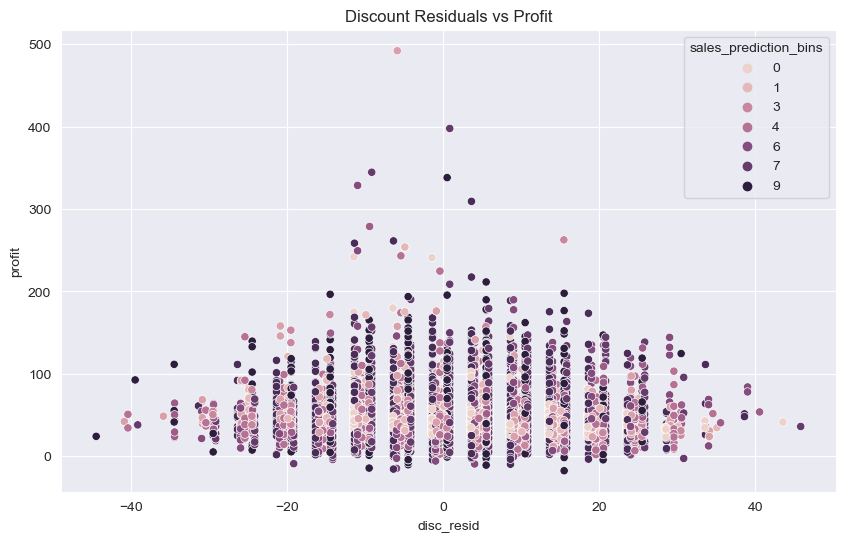

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(
    x='disc_resid', 
    y='profit',
    data=data.train.assign(disc_resid=debias_model.resid),
    hue='sales_prediction_bins',
    ax=ax
)
plt.title(f'Discount Residuals vs Profit')
plt.show()

In [26]:
denoise_model = smf.ols('profit ~ C(sales_prediction_bins)', data=data.train).fit()
denoise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     106.7
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          1.44e-194
Time:                        13:11:34   Log-Likelihood:                -68079.
No. Observations:               15000   AIC:                         1.362e+05
Df Residuals:                   14990   BIC:                         1.363e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        44.9166      0.585     76.815      0.000      43.770      46.063
C(sales_prediction_bins)[T.1]     0.0089      0.827      0.011      0.991      -1.612       1.630
C(sales_prediction_bins)[T.2]    -2.4622      0.827     -2.979      0.003      -4.082      -0.842
C(sales_prediction_bins)[T.3]    -4.5998      0.827     -5.560      0.000      -6.222      -2.978
C(sales_prediction_bins)[T.4]    -6.4300      0.827     -7.776      0.000      -8.051      -4.809
C(sales_prediction_bins)[T.5]    -7.2366      0.827     -8.751      0.000      -8.857      -5.616
C(sales_prediction_bins)[T.6]    -1.2356      0.827     -1.494      0.135      -2.856       0.385
C(sales_prediction_bins)[T.7]     7.2118      0.827      8.721      0.000       5.591       8.833
C(sales_prediction_bins)[T.8]     9.0098      0.827     10.895      0.000       7.389      10.631
C(sales_prediction_bins)[T.9]     8.5705      0.827     10.364      0.000       6.950      10.191
==============================================================================
Omnibus:                    11355.133   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           579849.513
Skew:                           3.161   Prob(JB):                         0.00
Kurtosis:                      32.796   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

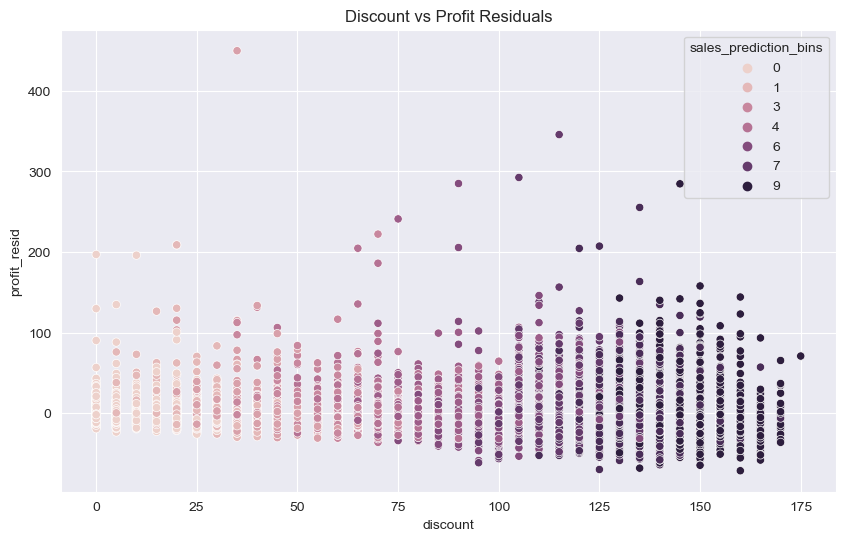

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(
    x='discount', 
    y='profit_resid',
    data=data.train.assign(profit_resid=denoise_model.resid),
    hue='sales_prediction_bins',
    ax=ax
)
plt.title(f'Discount vs Profit Residuals')
plt.show()

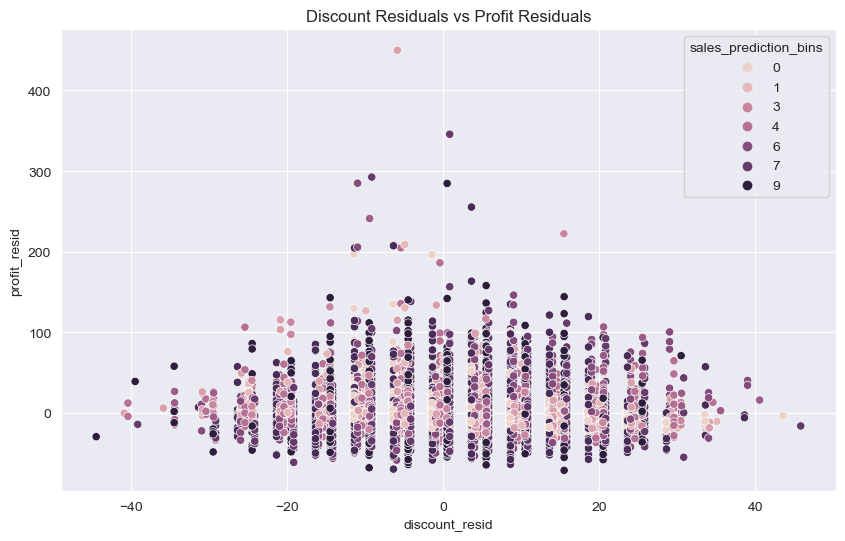

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(
    x='discount_resid', 
    y='profit_resid',
    data=data.train.assign(
        discount_resid=debias_model.resid,
        profit_resid=denoise_model.resid),
    hue='sales_prediction_bins',
    ax=ax
)
plt.title(f'Discount Residuals vs Profit Residuals')
plt.show()

In [32]:
final_fit = smf.ols(
    'profit_resid ~ discount_resid',
    data=data.train.assign(
        discount_resid=debias_model.resid,
        profit_resid=denoise_model.resid
    )
).fit()

final_fit.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           profit_resid   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.144
Date:                Tue, 20 Dec 2022   Prob (F-statistic):              0.143
Time:                        13:34:20   Log-Likelihood:                -68078.
No. Observations:               15000   AIC:                         1.362e+05
Df Residuals:                   14998   BIC:                         1.362e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -9.703e-14      0.185  -5.25e-13      1.000      -0.362       0.362
discount_resid    -0.0247      0.017     -1.464      0.143      -0.058       0.008
==============================================================================
Omnibus:                    11358.473   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           579356.418
Skew:                           3.163   Prob(JB):                         0.00
Kurtosis:                      32.782   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""